# Toronto AirBnB Listings Analysis
This project is part of Udacity Data Scientists Nano-degree Program to write a data science blog post.

The CRISP-DM methodology is applied in the analysis process of this project.


### Business Understanding:
In this project, I analyzed Toronto AirBnB listings data as an attempt to answer the following questions:. 

1. What are the most popular neighborhoods in Toronto?
2. What are the best affordable neighborhoods to live in?
3. What are the common amenities offered in Toronto's listings?

### Data Understanding:
Here I read the dataset provided by AirBnB into a panadas dataframe in order to asses it and examine it for further understanding.

In [87]:
#import all required libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
#read the dataset into a dataframe
df = pd.read_csv("TO_airbnb_data/1_Detailed_Listings_data_for_TO.csv")

In [89]:
#examine the number of rows and columns
df.shape

(18265, 74)

In [90]:
#examine all columns names, types, entries count, and null count.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18265 entries, 0 to 18264
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            18265 non-null  int64  
 1   listing_url                                   18265 non-null  object 
 2   scrape_id                                     18265 non-null  int64  
 3   last_scraped                                  18265 non-null  object 
 4   name                                          18264 non-null  object 
 5   description                                   17581 non-null  object 
 6   neighborhood_overview                         11336 non-null  object 
 7   picture_url                                   18265 non-null  object 
 8   host_id                                       18265 non-null  int64  
 9   host_url                                      18265 non-null 

In [91]:
#preview the dataframe
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20210102020445,2021-01-02,Beautiful home in amazing area!,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,1565,https://www.airbnb.com/users/show/1565,...,10.0,10.0,10.0,NaN,f,1,1,0,0,0.11
1,8077,https://www.airbnb.com/rooms/8077,20210102020445,2021-01-04,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,NaN,https://a0.muscache.com/pictures/11780344/141c...,22795,https://www.airbnb.com/users/show/22795,...,10.0,10.0,10.0,NaN,t,2,1,1,0,1.22
2,12604,https://www.airbnb.com/rooms/12604,20210102020445,2021-01-02,Seaton Village Parlour Bedroom,Comfortable sofa bed in airy main floor parlou...,NaN,https://a0.muscache.com/pictures/5282025/91fca...,48239,https://www.airbnb.com/users/show/48239,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
3,23691,https://www.airbnb.com/rooms/23691,20210102020445,2021-01-03,Queen Bedroom close to downtown,<b>The space</b><br />Nestled in the middle of...,NaN,https://a0.muscache.com/pictures/615528/d09ab3...,93825,https://www.airbnb.com/users/show/93825,...,10.0,9.0,10.0,NaN,t,2,0,2,0,1.68
4,27423,https://www.airbnb.com/rooms/27423,20210102020445,2021-01-05,Executive Studio Unit- Ideal for One Person,"Brand new, fully furnished studio basement apa...",NaN,https://a0.muscache.com/pictures/176936/b687ed...,118124,https://www.airbnb.com/users/show/118124,...,10.0,10.0,10.0,NaN,f,1,1,0,0,0.20


## Question 1: What are the most popular neighborhoods in Toronto?

### Data Preparation:
Here I use the wrangling process to gather the required data specific to answering this question. Then, clean and prepare the data.

In [92]:
#create a subset dataframe with the required columns
location_df=df[['neighbourhood_cleansed','review_scores_location']]

In [93]:
#check the number of rows to use as a reference when looking for missing values 
location_df.shape

(18265, 2)

In [94]:
#examine all columns names, types, entries count, and null count.
#obviously, we have missing values in 'review_scores_location'
location_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18265 entries, 0 to 18264
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  18265 non-null  object 
 1   review_scores_location  13856 non-null  float64
dtypes: float64(1), object(1)
memory usage: 285.5+ KB


In [95]:
#clean data by dropping rows with null values in 'review_scores_location'
location_df.dropna(subset=['review_scores_location'],axis=0,how='any',inplace=True)

In [96]:
#doucle-check the number of rows after the clean-up
location_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13856 entries, 0 to 18258
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  13856 non-null  object 
 1   review_scores_location  13856 non-null  float64
dtypes: float64(1), object(1)
memory usage: 324.8+ KB


### Data Modelling & Evaluation:
Here I model the cleaned data and visualize the end result.

In [97]:
#group the dataframe by neighborhood, calculate the average of review score, and display the top 10 results.
location_df.groupby(['neighbourhood_cleansed']).mean()['review_scores_location'].sort_values(ascending=False).head(10)

neighbourhood_cleansed
Rustic                               10.000000
Markland Wood                        10.000000
Playter Estates-Danforth              9.951220
The Beaches                           9.927419
Eringate-Centennial-West Deane        9.918919
Trinity-Bellwoods                     9.905556
Forest Hill South                     9.900000
Waterfront Communities-The Island     9.882497
Yonge-Eglinton                        9.880000
Kingsway South                        9.875000
Name: review_scores_location, dtype: float64

In [98]:
#group the dataframe by neighborhood, calculate the average of review score, and display the lowest 10 results.
(location_df.groupby(['neighbourhood_cleansed']).sum()['review_scores_location']/loc_count).sort_values(ascending=True).head(10)

Black Creek                 8.615385
Flemingdon Park             8.761905
Keelesdale-Eglinton West    9.029412
Glenfield-Jane Heights      9.040000
Downsview-Roding-CFB        9.088889
Humbermede                  9.111111
Eglinton East               9.129032
Agincourt North             9.142857
Kennedy Park                9.181818
Mount Dennis                9.192308
dtype: float64

## Question 2: What are the best affordable neighborhoods to live in?

### Data Preparation:
Here I use the wrangling process to gather the required data specific to answering this question. Then, clean and prepare the data.

In [99]:
#create a subset dataframe with the required columns
price_df=df[['neighbourhood_cleansed','price']]

In [100]:
#examine all columns names, types, entries count, and null count.
#luckily, we have no missing values.
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18265 entries, 0 to 18264
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   neighbourhood_cleansed  18265 non-null  object
 1   price                   18265 non-null  object
dtypes: object(2)
memory usage: 285.5+ KB


In [101]:
#clean the 'price' data by removing the '$' sign, and converting the type to float.
price_df['price'] = price_df['price'].map(lambda x: x.lstrip('$')).str.replace(r',','').astype(float)

### Data Modelling & Evaluation:
Here I model the cleaned data and visualize the end result.

In [102]:
#group the dataframe by neighborhood, calculate the average of rent price, and display the top 10 results.
price_df.groupby(['neighbourhood_cleansed']).mean()['price'].sort_values(ascending=False).head(10)

neighbourhood_cleansed
Rustic                               332.285714
Woburn                               299.888889
Yonge-St.Clair                       224.696970
Forest Hill South                    205.314286
Waterfront Communities-The Island    195.546729
Leaside-Bennington                   191.020833
Bathurst Manor                       190.609756
Maple Leaf                           190.333333
Kingsway South                       188.384615
Niagara                              187.755263
Name: price, dtype: float64

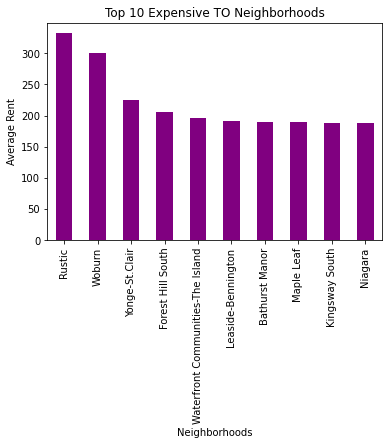

In [103]:
#plot and visualize the result using a bar chart.
price_df.groupby(['neighbourhood_cleansed']).mean()['price'].sort_values(ascending=False).head(10).plot(kind="bar", color="purple")
plt.title('Top 10 Expensive TO Neighborhoods')
plt.xlabel('Neighborhoods')
plt.ylabel('Average Rent')
plt.show()

In [104]:
#group the dataframe by neighborhood, calculate the average of rent price, and display the lowest 10 results.
price_df.groupby(['neighbourhood_cleansed']).mean()['price'].sort_values(ascending=True).head(10)

neighbourhood_cleansed
Malvern                              48.286885
Glenfield-Jane Heights               53.593750
Eglinton East                        54.075000
Steeles                              55.396226
Caledonia-Fairbank                   55.396226
Pleasant View                        57.116279
Black Creek                          57.695652
York University Heights              60.011429
Mount Olive-Silverstone-Jamestown    60.800000
Keelesdale-Eglinton West             62.025641
Name: price, dtype: float64

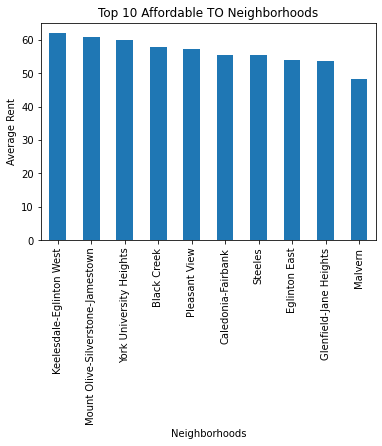

In [105]:
#plot and visualize the result using a bar chart.
price_df.groupby(['neighbourhood_cleansed']).mean()['price'].sort_values(ascending=False).tail(10).plot(kind="bar")
plt.title('Top 10 Affordable TO Neighborhoods')
plt.xlabel('Neighborhoods')
plt.ylabel('Average Rent')
plt.show()

## Question 3: What are the common amenities offered in Toronto's listings?

### Data Preparation:
Here I use the wrangling process to gather the required data specific to answering this question. Then, clean and prepare the data.

In [106]:
#create a subset dataframe with the required columns
amen_df=df[['amenities']]

In [107]:
#examine all columns names, types, entries count, and null count.
#luckily, we have no missing values.
amen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18265 entries, 0 to 18264
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   amenities  18265 non-null  object
dtypes: object(1)
memory usage: 142.8+ KB


In [108]:
#clean amenities input by removing unnecessary parts, and extracting the required data.
amenities=[]

def elem_extract (lst):
    for el in lst:
        amenities.append(el)

amen_df['amenities'].apply(lambda x: elem_extract(re.findall('"([^"]*)"', x.strip('[]').replace(r'\u2013',' ').replace(r'\u2019',' ').replace(r'\"',''))))

amenities

['Dryer',
 'Washer',
 'TV',
 'Shampoo',
 'Air conditioning',
 'Smoke alarm',
 'First aid kit',
 'Wifi',
 'Heating',
 'Fire extinguisher',
 'Indoor fireplace',
 'Kitchen',
 'Essentials',
 'Gym',
 'Elevator',
 'Air conditioning',
 'Wifi',
 'Heating',
 'Smoke alarm',
 'Cable TV',
 'TV',
 'Free parking on premises',
 'Pool',
 'Shampoo',
 'Wifi',
 'Indoor fireplace',
 'Essentials',
 'Dishes and silverware',
 'Private entrance',
 'Long term stays allowed',
 'Oven',
 'Stove',
 'Washer',
 'Extra pillows and blankets',
 'Free parking on premises',
 'Dedicated workspace',
 'Bed linens',
 'Hangers',
 'Microwave',
 'Keypad',
 'Air conditioning',
 'Wifi',
 'Coffee maker',
 'Free street parking',
 'Carbon monoxide alarm',
 'Dryer',
 'Kitchen',
 'Hair dryer',
 'Pocket wifi',
 'Iron',
 'Refrigerator',
 'Fire extinguisher',
 'Cooking basics',
 'Heating',
 'Smoke alarm',
 'Hot water',
 'Lock on bedroom door',
 'Dedicated workspace',
 'Dryer',
 'Air conditioning',
 'Fire extinguisher',
 'Free parking on 

In [109]:
#create a function to group/count the total number of listings for each amenity.
amen_dict={'amenities':[],'count':[]}

def group_list(lst):
    for el in lst:
        if el not in amen_dict['amenities']:
            amen_dict['amenities'].append(el)
            amen_dict['count'].append(lst.count(el))

group_list(amenities)

#create a new dataframe for the new clean data.
amen_df2=pd.DataFrame(amen_dict)

### Data Modelling & Evaluation:
Here I model the cleaned data and visualize the end result.

In [110]:
#sort and display top in-demand amenities.
amen_df2.sort_values('count', ascending=False).head(10)

,amenities,count
7,Wifi,17828
8,Heating,17609
5,Smoke alarm,17214
12,Essentials,17045
11,Kitchen,16700
4,Air conditioning,15694
26,Hangers,15263
31,Carbon monoxide alarm,14846
1,Washer,14669
0,Dryer,14478


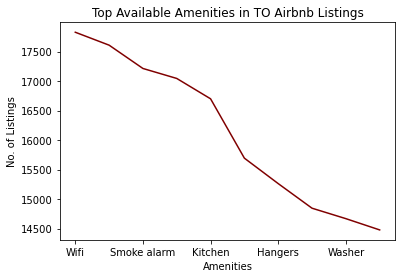

In [111]:
#plot and visualize the result using a bar chart.
amen_df2.sort_values('count', ascending=False).head(10).plot(x='amenities', y='count', color="maroon", legend=False)
plt.title('Top Available Amenities in TO Airbnb Listings')
plt.xlabel('Amenities')
plt.ylabel('No. of Listings')
plt.show()